<a href="https://colab.research.google.com/github/eternaldemon/AI-Median-TIET/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing


In [2]:
from google.colab import files
files.upload()

Saving Logistic_X_Test.csv to Logistic_X_Test.csv
Saving Logistic_X_Train.csv to Logistic_X_Train.csv
Saving Logistic_Y_Train.csv to Logistic_Y_Train.csv


{'Logistic_X_Test.csv': b'f1,f2\r\n-0.7998268565035295,-0.003833131707506307\r\n-0.757784717963196,1.0313703773657132\r\n1.036808320760033,-0.3570040938632459\r\n0.5695311050549665,1.0837747609596435\r\n0.9542049600835426,-0.5984115963598748\r\n1.0663157536784222,0.4644116383078548\r\n0.7402412660016647,0.3605233310625886\r\n-0.2672302479979446,1.3817060619602546\r\n-0.02573001040756137,-0.1553650816556541\r\n0.5496512623598617,0.7325304797742362\r\n0.5924571582883014,-0.1280641841351842\r\n1.113416596272572,-0.5276193953377718\r\n-0.7843158440792295,0.7147746710914096\r\n1.465223945661649,-0.6734825194438656\r\n1.3190507415868766,0.2510237436248207\r\n1.6397053967085073,0.31424512649911396\r\n0.2114002700213033,0.7648271824662318\r\n-0.756087301865468,0.7991456549511513\r\n1.4686662439639209,-0.27694769948618914\r\n0.4006814026562327,0.8316786802493364\r\n0.18749561448394525,1.0959050215748052\r\n0.16735820211994318,-0.35630085118438404\r\n2.5250325459901273,0.08727288834007214\r\n-0.

In [124]:
xtrain = pd.read_csv('Logistic_X_Train.csv')
ytrain = pd.read_csv('Logistic_Y_Train.csv')
xtest = pd.read_csv('Logistic_X_Test.csv')

In [125]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

(2250, 2)
(2250, 1)
(750, 2)


In [126]:
# Checking for outliers and range of values
xtrain.describe()

,f1,f2
count,2250.000000,2250.000000
mean,0.503961,0.256657
std,0.883508,0.528383
min,-1.424812,-0.970769
25%,-0.101161,-0.167003
50%,0.502114,0.245482
75%,1.125208,0.684030
max,2.443571,1.437729


In [127]:
# Checking for null values
xtrain.isnull().sum()

f1    0
f2    0
dtype: int64

In [128]:
ytrain.isnull().sum()

label    0
dtype: int64

In [129]:
ytrain['label'].value_counts()

0    1129
1    1121
Name: label, dtype: int64

In [130]:
columns = xtrain.columns.tolist()

In [131]:
columns

['f1', 'f2']

In [132]:
# Before Scaling
xtrain.describe()

,f1,f2
count,2250.000000,2250.000000
mean,0.503961,0.256657
std,0.883508,0.528383
min,-1.424812,-0.970769
25%,-0.101161,-0.167003
50%,0.502114,0.245482
75%,1.125208,0.684030
max,2.443571,1.437729


In [133]:
# Normalizing the data
xtrain=preprocessing.normalize(xtrain,axis=1)

In [112]:
# MinMaxScaler(Use above or this)
#########################################
'''
scaler = preprocessing.MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
'''

In [134]:
xtrain = pd.DataFrame(xtrain)

In [135]:
#After scaling
xtrain.describe()

,0,1
count,2250.000000,2250.000000
mean,0.379033,0.258118
std,0.693642,0.555806
min,-1.000000,-0.999859
25%,-0.171995,-0.177330
50%,0.745705,0.252541
75%,0.962002,0.812595
max,1.000000,0.999999


In [159]:
xtrain.columns = ['f1','f2']

In [161]:
xtrain.columns

Index(['f1', 'f2'], dtype='object')

In [157]:
xtrain.shape[0]

2250

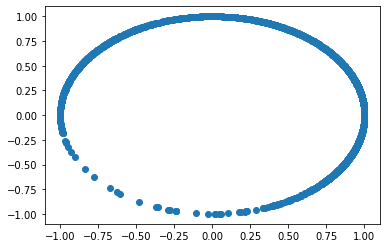

In [169]:
plt.scatter(xtrain['f1'],xtrain['f2'])
plt.show()

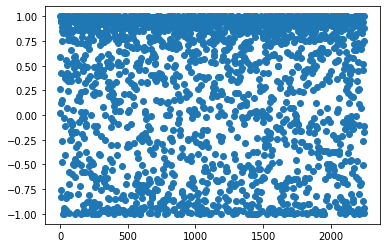

In [168]:
plt.scatter(range(xtrain.shape[0]),xtrain['f1'])
plt.show()

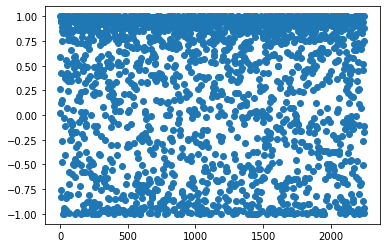

In [167]:
plt.scatter(range(xtrain.shape[0]),xtrain['f1'])
plt.show()

In [136]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Input
from tensorflow.keras.models import Model

In [254]:
i = Input(shape=(2,))
o = Flatten()(i)
o = Dense(128,activation='relu')(o)
o = Dropout(0.3)(o)
o = Dense(32,activation='relu')(o)
o = Dropout(0.3)(o)
o = Dense(1,activation='sigmoid')(o)
model = Model(i,o)

In [255]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 2)                 0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               384       
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33 

In [256]:
#opt = tf.keras.optimizers.SGD(lr=0.0001)
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(xtrain,ytrain,epochs=100,verbose=2,shuffle=True,validation_split=0.2)

Epoch 1/100
57/57 - 0s - loss: 0.6752 - accuracy: 0.6083 - val_loss: 0.6400 - val_accuracy: 0.8711
Epoch 2/100
57/57 - 0s - loss: 0.6333 - accuracy: 0.7750 - val_loss: 0.5949 - val_accuracy: 0.8689
Epoch 3/100
57/57 - 0s - loss: 0.5948 - accuracy: 0.8244 - val_loss: 0.5553 - val_accuracy: 0.8689
Epoch 4/100
57/57 - 0s - loss: 0.5641 - accuracy: 0.8411 - val_loss: 0.5205 - val_accuracy: 0.8689
Epoch 5/100
57/57 - 0s - loss: 0.5344 - accuracy: 0.8372 - val_loss: 0.4896 - val_accuracy: 0.8689
Epoch 6/100
57/57 - 0s - loss: 0.5110 - accuracy: 0.8361 - val_loss: 0.4632 - val_accuracy: 0.8689
Epoch 7/100
57/57 - 0s - loss: 0.4885 - accuracy: 0.8356 - val_loss: 0.4419 - val_accuracy: 0.8733
Epoch 8/100
57/57 - 0s - loss: 0.4727 - accuracy: 0.8394 - val_loss: 0.4243 - val_accuracy: 0.8689
Epoch 9/100
57/57 - 0s - loss: 0.4558 - accuracy: 0.8439 - val_loss: 0.4096 - val_accuracy: 0.8733
Epoch 10/100
57/57 - 0s - loss: 0.4507 - accuracy: 0.8467 - val_loss: 0.3981 - val_accuracy: 0.8733
Epoch 11/

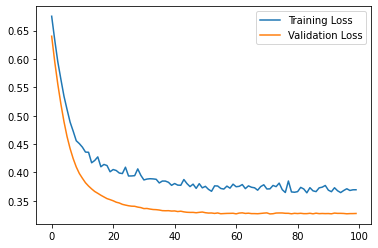

In [257]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

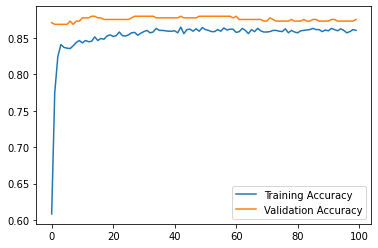

In [258]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [259]:
# Preprocessing the test data
xtest=preprocessing.normalize(xtest,axis=1)

In [260]:
xtest = pd.DataFrame(xtest)
xtest.describe()

,0,1
count,750.000000,750.000000
mean,0.347182,0.241026
std,0.704366,0.571258
min,-0.999989,-0.999261
25%,-0.235104,-0.211881
50%,0.666684,0.240291
75%,0.954827,0.805461
max,1.000000,0.999999


In [283]:
ypred = model.predict(xtest)
print(ypred.shape)

(750, 1)


In [284]:
ypred = pd.DataFrame(ypred,columns=['label'])

In [285]:
ypred.describe()

,label
count,750.000000
mean,0.502101
std,0.380256
min,0.099670
25%,0.157768
50%,0.244560
75%,0.955478
max,0.992471


In [280]:
q75, q25 = np.percentile(ypred, [75 ,25])
iqr = q75 - q25
print(iqr)

0.7977103963494301


In [286]:
for i in range(len(ypred)):
  if ypred.iloc[i,0]>=0.380256:
    ypred.iloc[i,0] = 1
  else:
    ypred.iloc[i,0] = 0

In [287]:
ypred['label'].value_counts().sort_values(ascending=True).head()

1.0    352
0.0    398
Name: label, dtype: int64

In [288]:
ypred.to_csv('Output.csv',index=False)